In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import preprocessing

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_dia=pd.read_csv('diabetes.csv')

print(data_dia)

In [3]:
y=data_dia.Outcome
x=data_dia.drop('Outcome',axis=1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
print("\nx_train:\n")
print(x_train.head())
print(x_train.shape)

print("\nx_test:\n")
print(x_test.head())
print(x_test.shape)


x_train:

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
86            13      106             72             54        0  36.6   
539            3      129             92             49      155  36.4   
80             3      113             44             13        0  22.4   
177            0      129            110             46      130  67.1   
559           11       85             74              0        0  30.1   

     DiabetesPedigreeFunction  Age  
86                      0.178   45  
539                     0.968   32  
80                      0.140   22  
177                     0.319   26  
559                     0.300   35  
(614, 8)

x_test:

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
69             4      146             85             27      100  28.9   
563            6       99             60             19       54  26.9   
192            7      159             66              0        0  30.4   
249    

In [ ]:
#KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [29]:
y_train_predicted = knn.predict(x_train)

In [30]:
print("Training Classification accuracy:", knn.score(x_train, y_train))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(y_train, y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(y_train, y_train_predicted))

Training Classification accuracy: 1.0


Training Confusion matrix: 
[[397   0]
 [  0 217]]


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       217

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [31]:
y_test_predicted = knn.predict(x_test)
conf_matrix_knn = confusion_matrix(y_test, y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(x_test,y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(y_test, y_test_predicted))

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.6038961038961039


Test Confusion matrix: 
[[73 30]
 [31 20]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       103
           1       0.40      0.39      0.40        51

    accuracy                           0.60       154
   macro avg       0.55      0.55      0.55       154
weighted avg       0.60      0.60      0.60       154



In [ ]:
#ROC Curve

In [33]:
y_pred_prob = knn.predict_proba(x_test)[:, 1]

Area Under the Curve (AUC):
 0.5504473634113839


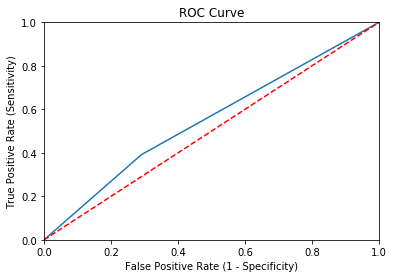

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area Under the Curve (AUC):\n", roc_auc_score(y_test, y_pred_prob))

In [35]:
for i in range (1,6):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(x_train, y_train)
    
    y_pred_prob = knn.predict_proba(x_test)[:, 1]
    
    print("{0} Neighbors-UNIFORM".format(i))
    print('--------------------')
    print("Accuracy:",knn.score(x_test,y_test))
    print("F1:",f1_score(y_test,knn.predict(x_test),average='weighted'))
    print("ROC Curve AUC:", roc_auc_score(y_test, y_pred_prob))
    print()

1 Neighbors-UNIFORM
--------------------
Accuracy: 0.6038961038961039
F1: 0.6028919662152551
ROC Curve AUC: 0.5504473634113839

2 Neighbors-UNIFORM
--------------------
Accuracy: 0.6818181818181818
F1: 0.638250178850587
ROC Curve AUC: 0.6767561393489434

3 Neighbors-UNIFORM
--------------------
Accuracy: 0.6363636363636364
F1: 0.6344755244755244
ROC Curve AUC: 0.6812297734627832

4 Neighbors-UNIFORM
--------------------
Accuracy: 0.6883116883116883
F1: 0.6674397031539889
ROC Curve AUC: 0.7086426803731202

5 Neighbors-UNIFORM
--------------------
Accuracy: 0.6883116883116883
F1: 0.6849191624701828
ROC Curve AUC: 0.7008376166000381



In [36]:
#Naive Bayes


In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print(nb)

y_expect=y_test
y_pred=nb.predict(x_test)
print(accuracy_score(y_expect,y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.7727272727272727


In [44]:
#Logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state = 42)
logit.fit(x_train, y_train)
print(logit)

y_expect=y_test
y_pred=logit.predict(x_test)
print(accuracy_score(y_expect,y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.7987012987012987


In [47]:
#Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
 
rn_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rn_forest.fit(x_train, y_train)
print(rn_forest)

y_expect=y_test
y_pred=rn_forest.predict(x_test)
print(accuracy_score(y_expect,y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
0.7532467532467533


In [104]:
#SVM

In [51]:
from sklearn.svm import SVC
svc_linear = SVC(kernel = 'linear', probability= True, random_state = 42)
svc_linear.fit(x_train, y_train)
print(svc_linear)

y_expect=y_test
y_pred=svc_linear.predict(x_test)
print(accuracy_score(y_expect,y_pred))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=42,
    shrinking=True, tol=0.001, verbose=False)
0.7792207792207793


In [52]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', probability= True, random_state = 42)
svc_rbf.fit(x_train, y_train)
print(svc_rbf)

y_expect=y_test
y_pred=svc_rbf.predict(x_test)
print(accuracy_score(y_expect,y_pred))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=42,
    shrinking=True, tol=0.001, verbose=False)
0.6688311688311688


In [53]:
#Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_tree.fit(x_train, y_train)
print(d_tree)

y_expect=y_test
y_pred=d_tree.predict(x_test)
print(accuracy_score(y_expect,y_pred))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
0.7077922077922078


In [56]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=23)
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=23, splitter='best')

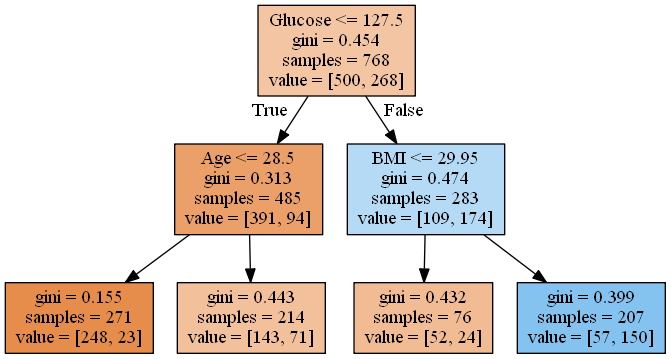

In [66]:
graphClf = print_tree(tree_clf, features=x.columns, class_names=None)
Image(graphClf.create_png())

In [55]:
import pydotplus as pplus
import graphviz
from IPython.display import Image

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\12166\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [58]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [71]:
#Evaluation

In [72]:
for model in (knn,logit,nb,rn_forest,svc_linear,svc_rbf,d_tree):
    print(model)
    print('---------------------------------------------')
    print("Accuracy:", model.score(x_test,y_test))    
    print("F1:",f1_score(y_test,model.predict(x_test),average='weighted'))
    print("ROC Curve AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))
    print("\n")
    print("Classification Report:\n",classification_report(y_test, model.predict(x_test)))
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
---------------------------------------------
Accuracy: 0.6883116883116883
F1: 0.6849191624701828
ROC Curve AUC: 0.7008376166000381


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       103
           1       0.53      0.49      0.51        51

    accuracy                           0.69       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
----

C:\Users\12166\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\12166\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
#Test Model


In [74]:
#KNN test

In [76]:
knn_cv = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn_cv.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [77]:
scores=cross_val_score(knn_cv, x_train, y_train, cv=10, scoring = 'accuracy')
scores

array([0.58064516, 0.66129032, 0.75806452, 0.77419355, 0.64516129,
       0.66129032, 0.75806452, 0.78333333, 0.78333333, 0.86666667])

In [78]:
scores.mean()

0.7272043010752688

In [79]:
#Naive Bayes

In [80]:
nbscore=cross_val_score(nb, x_train, y_train, cv=10, scoring = 'accuracy')
nbscore

array([0.69354839, 0.67741935, 0.79032258, 0.69354839, 0.77419355,
       0.79032258, 0.75806452, 0.78333333, 0.81666667, 0.8       ])

In [81]:
nbscore.mean()

0.7577419354838709

In [82]:
#Logistic regression


In [83]:
loscore=cross_val_score(logit, x_train, y_train, cv=10, scoring = 'accuracy')
loscore

array([0.67741935, 0.74193548, 0.77419355, 0.72580645, 0.77419355,
       0.74193548, 0.74193548, 0.76666667, 0.85      , 0.81666667])

In [84]:
loscore.mean()

0.7610752688172042

In [85]:
#random forest

In [86]:
rascore=cross_val_score(rn_forest, x_train, y_train, cv=10, scoring = 'accuracy')
rascore

array([0.72580645, 0.74193548, 0.70967742, 0.67741935, 0.77419355,
       0.74193548, 0.82258065, 0.71666667, 0.78333333, 0.76666667])

In [87]:
rascore.mean()

0.746021505376344

In [88]:
#SVM

In [89]:
#Linear

In [90]:
SVscore=cross_val_score(svc_linear, x_train, y_train, cv=10, scoring = 'accuracy')
SVscore

array([0.66129032, 0.74193548, 0.75806452, 0.72580645, 0.74193548,
       0.80645161, 0.77419355, 0.78333333, 0.85      , 0.81666667])

In [91]:
SVscore.mean()

0.7659677419354838

In [92]:
#rbf

In [94]:
rbfscore=cross_val_score(svc_rbf, x_train, y_train, cv=10, scoring = 'accuracy')
rbfscore

array([0.64516129, 0.64516129, 0.64516129, 0.64516129, 0.64516129,
       0.64516129, 0.64516129, 0.65      , 0.65      , 0.65      ])

In [95]:
rbfscore.mean()

0.6466129032258066

In [96]:
#Decision tree

In [97]:
DEscore=cross_val_score(d_tree , x_train, y_train, cv=10, scoring = 'accuracy')
DEscore

array([0.59677419, 0.64516129, 0.74193548, 0.66129032, 0.69354839,
       0.70967742, 0.77419355, 0.71666667, 0.76666667, 0.75      ])

In [98]:
DEscore.mean()

0.7055913978494623

In [99]:
#Best Model

In [100]:
#If we look at the Evaluation part, the accuracy for models with Tuning Hyperparameters, we will find that the logistic regression with the highest accuracy: 0.7987.
#However, this kind of accuracy rewards overly complex models which overfit the training data. Instead, we use cross validation
# to test the model. After using the cross validation with K=10, we get the mean accuracy for each model. SVM linear model with
#the highest accuracy: 0.7659, which is slightly higher than the accuracy(0.7611) of logistic regression model. Thus, I would 
#use SVM linear model to test whether a patient has diabetes. 